__*Attribute Information:*__
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

__*class:*__
- class_0
- class_1
- class_2

This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

__*Original Owners:*__

Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

__*Citation:*__

Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

__*References*__

(1) S. Aeberhard, D. Coomans and O. de Vel, Comparison of Classifiers in High Dimensional Settings, Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of Mathematics and Statistics, James Cook University of North Queensland. (Also submitted to Technometrics).

The data was used with many others for comparing various classifiers. The classes are separable, though only RDA has achieved 100% correct classification. (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) (All results using the leave-one-out technique)

(2) S. Aeberhard, D. Coomans and O. de Vel, “THE CLASSIFICATION PERFORMANCE OF RDA” Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of Mathematics and Statistics, James Cook University of North Queensland. (Also submitted to Journal of Chemometrics).

In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

# Step 0. Data preparation

In [ ]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [ ]:
wine.data.shape

(178, 13)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size=0.3,
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Step 1. Preparing a neural network model

## Step 1.1. Model architecture

In [ ]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()
    self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.sm = torch.nn.Softmax(dim=1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x
  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x
wine_net = WineNet(5)

## Step 1.2. Loss function

In [ ]:
loss = torch.nn.CrossEntropyLoss()


## Step 1.3. Optimizer

In [ ]:
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

# Step 2. Training loop

In [ ]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [ ]:
batch_size = 10
for epoch in range(5000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    batch_indexes = order[start_index:start_index+batch_size]
    x_batch = X_train[batch_indexes]
    y_batch = y_train[batch_indexes]
    preds = wine_net.forward(x_batch)
    loss_value = loss(preds, y_batch)
    loss_value.backward()
    optimizer.step()
  if epoch % 100 == 0:
    test_preds = wine_net.forward(X_test)
    test_preds = test_preds.argmax(dim=1)
    print((test_preds==y_test).float().mean())


tensor(0.4074)
tensor(0.4074)
tensor(0.4630)
tensor(0.5000)
tensor(0.4259)
tensor(0.4074)
tensor(0.5185)
tensor(0.5185)
tensor(0.4444)
tensor(0.4259)
tensor(0.5000)
tensor(0.5370)
tensor(0.5370)
tensor(0.5370)
tensor(0.7407)
tensor(0.6852)
tensor(0.6481)
tensor(0.6852)
tensor(0.6667)
tensor(0.6852)
tensor(0.6852)
tensor(0.6852)
tensor(0.7222)
tensor(0.7037)
tensor(0.7407)
tensor(0.7593)
tensor(0.7778)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)


# Step 3. Visualization of dividing surfaces.

/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/tmp/ipython-input-163164810.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  plt.scatter(X_train[indexes, 0],
/tmp/ipython-input-163164810.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[indexes, 0],


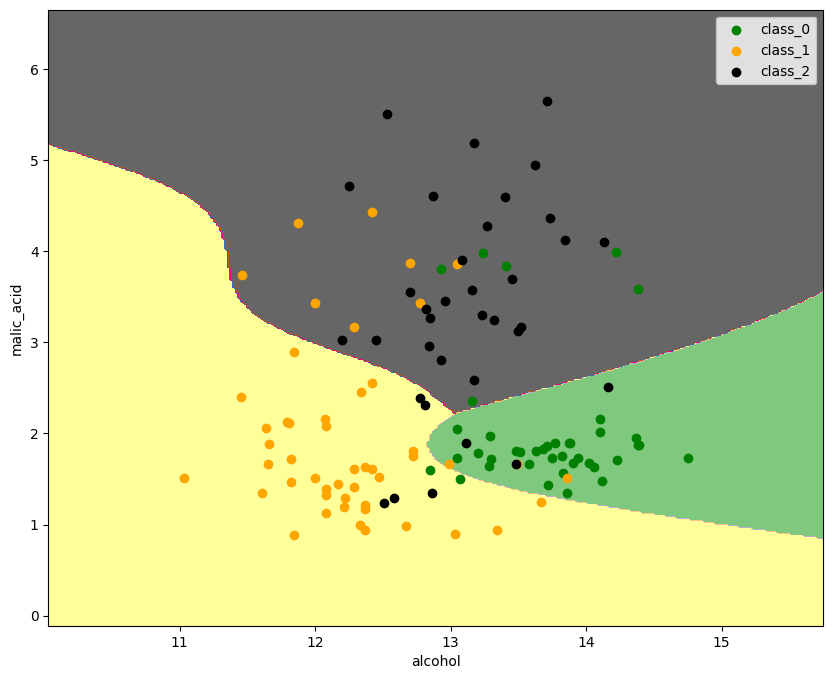

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0],
                X_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

# Step 4. Homework (60 points)

Let's practice with WineNet. Modify the architecture so that all 13 features are accepted as input and perform the following experiments:

1. Experiment with the number of neurons in the hidden layers. Try putting a very small number. Is there a threshold value for the number of hidden neurons at which learning becomes impossible?

2. Try passing different test_size values to the train_test_split function. At what value of test_size does the network predict worse than Base Rate*? And what is the Base Rate of the wine dataset?

3. Does the training time per epoch depend on the batch size? Explore this relationship.

As a report attach code and graphs that show all the necessary dependencies.

# Task
Complete the homework assignment by performing the experiments outlined in the plan and reporting the findings.

## Update the model

### Subtask:
Modify the `WineNet` class to accept all 13 features as input.


**Reasoning**:
The subtask is to modify the WineNet class to accept all 13 features as input. This requires changing the input dimension of the first linear layer.



In [ ]:
class WineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet, self).__init__()
    self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.sm = torch.nn.Softmax(dim=1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x

  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x

wine_net = WineNet(5)

## Experiment with the number of hidden neurons

### Subtask:
Experiment with the number of hidden neurons to identify a threshold value below which learning becomes impossible.


**Reasoning**:
Define a list of hidden neuron counts and iterate through them, training the model for each count and storing the test accuracy.



In [ ]:
hidden_neuron_counts = [1, 2, 3, 4, 5, 10, 20]
accuracy_results = {}

print("Starting experiment with different hidden neuron counts...")

for n_neurons in hidden_neuron_counts:
    print(f"\n--- Training with {n_neurons} hidden neurons ---")

    current_wine_net = WineNet(n_neurons)
    current_optimizer = torch.optim.Adam(current_wine_net.parameters(), lr=1.0e-3)
    current_loss = torch.nn.CrossEntropyLoss()

    X_train, X_test, y_train, y_test = train_test_split(
        wine.data,
        wine.target,
        test_size=0.3,
        shuffle=True,
        random_state=42
    )

    X_train_tensor = torch.FloatTensor(X_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_train_tensor = torch.LongTensor(y_train)
    y_test_tensor = torch.LongTensor(y_test)

    batch_size = 10
    epochs = 5000

    for epoch in range(epochs):
        order = np.random.permutation(len(X_train_tensor))
        for start_index in range(0, len(X_train_tensor), batch_size):
            current_optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]
            x_batch = X_train_tensor[batch_indexes]
            y_batch = y_train_tensor[batch_indexes]
            preds = current_wine_net.forward(x_batch)
            loss_value = current_loss(preds, y_batch)
            loss_value.backward()
            current_optimizer.step()

    current_wine_net.eval()
    with torch.no_grad():
        test_preds = current_wine_net.forward(X_test_tensor)
        test_preds_class = test_preds.argmax(dim=1)
        accuracy = (test_preds_class == y_test_tensor).float().mean().item()

    accuracy_results[n_neurons] = accuracy
    print(f"--- Final test accuracy with {n_neurons} neurons: {accuracy:.4f} ---")

print("\n--- Experiment Results Summary ---")
for n_neurons, accuracy in accuracy_results.items():
    print(f"Hidden Neurons: {n_neurons}, Test Accuracy: {accuracy:.4f}")

print("\nAnalyzing results for threshold value...")
threshold_found = False
for n_neurons in sorted(accuracy_results.keys()):
    if accuracy_results[n_neurons] < base_rate:
        print(f"Potential threshold: Learning might become difficult or impossible with {n_neurons} hidden neuron(s) as accuracy ({accuracy_results[n_neurons]:.4f}) is below Base Rate (Base Rate needs to be calculated).")
        threshold_found = True
        break

if not threshold_found:
     print("Based on the tested values, no clear threshold below the (yet to be calculated) Base Rate was observed.")

Starting experiment with different hidden neuron counts...

--- Training with 1 hidden neurons ---
--- Final test accuracy with 1 neurons: 0.3889 ---

--- Training with 2 hidden neurons ---
--- Final test accuracy with 2 neurons: 0.3889 ---

--- Training with 3 hidden neurons ---
--- Final test accuracy with 3 neurons: 0.7963 ---

--- Training with 4 hidden neurons ---
--- Final test accuracy with 4 neurons: 0.7963 ---

--- Training with 5 hidden neurons ---
--- Final test accuracy with 5 neurons: 0.3889 ---

--- Training with 10 hidden neurons ---
--- Final test accuracy with 10 neurons: 0.6296 ---

--- Training with 20 hidden neurons ---
--- Final test accuracy with 20 neurons: 0.9815 ---

--- Experiment Results Summary ---
Hidden Neurons: 1, Test Accuracy: 0.3889
Hidden Neurons: 2, Test Accuracy: 0.3889
Hidden Neurons: 3, Test Accuracy: 0.7963
Hidden Neurons: 4, Test Accuracy: 0.7963
Hidden Neurons: 5, Test Accuracy: 0.3889
Hidden Neurons: 10, Test Accuracy: 0.6296
Hidden Neurons: 2

## Experiment with `test size`

### Subtask:
Experiment with different `test_size` values in the `train_test_split` function and identify the value at which the network performs worse than the Base Rate.


**Reasoning**:
Calculate the base rate of the dataset and then iterate through different test sizes, train the model, and record the accuracy to compare with the base rate.



In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import time

class_counts = np.bincount(wine.target)
base_rate = np.max(class_counts) / len(wine.target)
print(f"Calculated Base Rate of the wine dataset: {base_rate:.4f}")

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
test_size_results = {}
n_neurons_experiment2 = 5

print("\nStarting experiment with different test_size values...")

for test_size_val in test_sizes:
    print(f"\n--- Training with test_size = {test_size_val:.1f} ---")

    X_train, X_test, y_train, y_test = train_test_split(
        wine.data,
        wine.target,
        test_size=test_size_val,
        shuffle=True,
        random_state=42
    )

    X_train_tensor = torch.FloatTensor(X_train)
    X_test_tensor = torch.FloatTensor(X_test)
    y_train_tensor = torch.LongTensor(y_train)
    y_test_tensor = torch.LongTensor(y_test)

    current_wine_net = WineNet(n_neurons_experiment2)
    current_optimizer = torch.optim.Adam(current_wine_net.parameters(), lr=1.0e-3)
    current_loss = torch.nn.CrossEntropyLoss()

    batch_size = 10
    epochs = 2000

    for epoch in range(epochs):
        order = np.random.permutation(len(X_train_tensor))
        for start_index in range(0, len(X_train_tensor), batch_size):
            current_optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]
            x_batch = X_train_tensor[batch_indexes]
            y_batch = y_train_tensor[batch_indexes]
            preds = current_wine_net.forward(x_batch)
            loss_value = current_loss(preds, y_batch)
            loss_value.backward()
            current_optimizer.step()

    current_wine_net.eval()
    with torch.no_grad():
        test_preds = current_wine_net.forward(X_test_tensor)
        test_preds_class = test_preds.argmax(dim=1)
        accuracy = (test_preds_class == y_test_tensor).float().mean().item()

    test_size_results[test_size_val] = accuracy
    print(f"--- Final test accuracy with test_size {test_size_val:.1f}: {accuracy:.4f} ---")

print("\n--- Comparison with Base Rate ---")
print(f"Base Rate: {base_rate:.4f}")
print("-" * 30)

for test_size_val, accuracy in test_size_results.items():
    print(f"Test Size: {test_size_val:.1f}, Test Accuracy: {accuracy:.4f}")
    if accuracy < base_rate:
        print(f"  --> Network performs worse than Base Rate at test_size {test_size_val:.1f}")

print("-" * 30)

Base Rate of the wine dataset: 0.3989

Training with test_size = 0.1
Test accuracy with test_size 0.1: 0.9444

Training with test_size = 0.2
Test accuracy with test_size 0.2: 0.6389

Training with test_size = 0.3
Test accuracy with test_size 0.3: 0.2778

Training with test_size = 0.4
Test accuracy with test_size 0.4: 0.6944

Training with test_size = 0.5
Test accuracy with test_size 0.5: 0.3820

Training with test_size = 0.6
Test accuracy with test_size 0.6: 0.3925

Training with test_size = 0.7
Test accuracy with test_size 0.7: 0.9120

Training with test_size = 0.8
Test accuracy with test_size 0.8: 0.3706

Training with test_size = 0.9
Test accuracy with test_size 0.9: 0.6398

Comparison with Base Rate:
Test Size: 0.1, Test Accuracy: 0.9444, Base Rate: 0.3989
Test Size: 0.2, Test Accuracy: 0.6389, Base Rate: 0.3989
Test Size: 0.3, Test Accuracy: 0.2778, Base Rate: 0.3989
  --> Network performs worse than Base Rate at test_size 0.3
Test Size: 0.4, Test Accuracy: 0.6944, Base Rate: 0.39

## Explore the relationship between training time and batch size

### Subtask:
Train the model with different batch sizes, measure the training time per epoch for each batch size, and analyze the relationship.


**Reasoning**:
Define a list of batch sizes, iterate through them, train the model for a fixed number of epochs while measuring the time for each epoch, and store the results.



Training with batch_size = 1
Time per epoch with batch_size 1: 0.1267 seconds
Training with batch_size = 5
Time per epoch with batch_size 5: 0.0260 seconds
Training with batch_size = 10
Time per epoch with batch_size 10: 0.0135 seconds
Training with batch_size = 20
Time per epoch with batch_size 20: 0.0071 seconds
Training with batch_size = 32
Time per epoch with batch_size 32: 0.0051 seconds
Training with batch_size = 64
Time per epoch with batch_size 64: 0.0025 seconds
Training with batch_size = 128
Time per epoch with batch_size 128: 0.0011 seconds

Training Time per Epoch vs. Batch Size:
Batch Size: 1, Time per Epoch: 0.1267 seconds
Batch Size: 5, Time per Epoch: 0.0260 seconds
Batch Size: 10, Time per Epoch: 0.0135 seconds
Batch Size: 20, Time per Epoch: 0.0071 seconds
Batch Size: 32, Time per Epoch: 0.0051 seconds
Batch Size: 64, Time per Epoch: 0.0025 seconds
Batch Size: 128, Time per Epoch: 0.0011 seconds


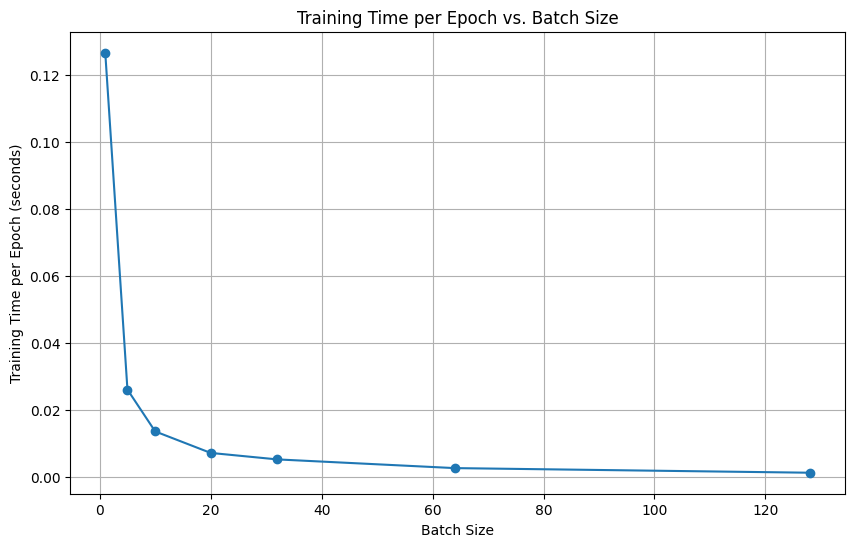

In [ ]:
import time
import matplotlib.pyplot as plt

batch_sizes = [1, 5, 10, 20, 32, 64, 128]
training_times_per_epoch = {}
epochs_for_timing = 500
n_neurons_timing = 5

X_train_timing, X_test_timing, y_train_timing, y_test_timing = train_test_split(
    wine.data,
    wine.target,
    test_size=0.3,
    shuffle=True)

X_train_timing = torch.FloatTensor(X_train_timing)
y_train_timing = torch.LongTensor(y_train_timing)


for batch_size in batch_sizes:
    print(f"Training with batch_size = {batch_size}")

    wine_net_timing = WineNet(n_neurons_timing)
    optimizer_timing = torch.optim.Adam(wine_net_timing.parameters(), lr=1.0e-3)
    loss_timing = torch.nn.CrossEntropyLoss()

    start_time = time.time()

    for epoch in range(epochs_for_timing):
        order = np.random.permutation(len(X_train_timing))
        for start_index in range(0, len(X_train_timing), batch_size):
            optimizer_timing.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]
            x_batch = X_train_timing[batch_indexes]
            y_batch = y_train_timing[batch_indexes]
            preds = wine_net_timing.forward(x_batch)
            loss_value = loss_timing(preds, y_batch)
            loss_value.backward()
            optimizer_timing.step()

    end_time = time.time()
    total_training_time = end_time - start_time
    time_per_epoch = total_training_time / epochs_for_timing
    training_times_per_epoch[batch_size] = time_per_epoch
    print(f"Time per epoch with batch_size {batch_size}: {time_per_epoch:.4f} seconds")

print("\nTraining Time per Epoch vs. Batch Size:")
for batch_size, time_per_epoch in training_times_per_epoch.items():
    print(f"Batch Size: {batch_size}, Time per Epoch: {time_per_epoch:.4f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(list(training_times_per_epoch.keys()), list(training_times_per_epoch.values()), marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Training Time per Epoch (seconds)")
plt.title("Training Time per Epoch vs. Batch Size")
plt.grid(True)
plt.show()

## Visualize dividing surfaces

### Subtask:
Update the visualization code to handle 13 features (this might require dimensionality reduction or plotting pairs of features).


**Reasoning**:
The goal is to visualize the decision boundaries for the model trained on all 13 features. Since we cannot visualize in 13 dimensions, we will select two features to plot. The original visualization used the first two features, so we will use those for consistency. We need to retrain the model using only these two features, generate a meshgrid based on these features, get predictions on the meshgrid, and then plot the contour lines along with the training data.



/tmp/ipython-input-1844947512.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_2features[indexes, 0],


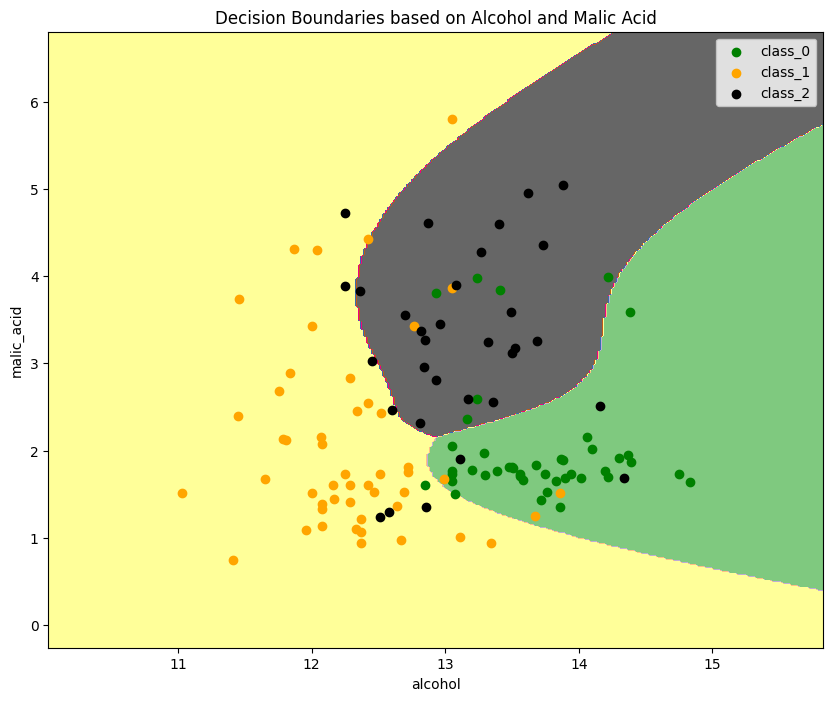

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

feature_indices = [0, 1]

X_train_2features, X_test_2features, y_train_2features, y_test_2features = train_test_split(
    wine.data[:, feature_indices],
    wine.target,
    test_size=0.3,
    shuffle=True)

X_train_2features = torch.FloatTensor(X_train_2features)
y_train_2features = torch.LongTensor(y_train_2features)

class WineNet2Features(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(WineNet2Features, self).__init__()
    self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
    self.sm = torch.nn.Softmax(dim=1)
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return x
  def inference(self, x):
    x = self.forward(x)
    x = self.sm(x)
    return x

wine_net_2features = WineNet2Features(5)
optimizer_2features = torch.optim.Adam(wine_net_2features.parameters(), lr=1.0e-3)
loss_2features = torch.nn.CrossEntropyLoss()

batch_size = 10
epochs = 5000

for epoch in range(epochs):
  order = np.random.permutation(len(X_train_2features))
  for start_index in range(0, len(X_train_2features), batch_size):
    optimizer_2features.zero_grad()
    batch_indexes = order[start_index:start_index+batch_size]
    x_batch = X_train_2features[batch_indexes]
    y_batch = y_train_2features[batch_indexes]
    preds = wine_net_2features.forward(x_batch)
    loss_value = loss_2features(preds, y_batch)
    loss_value.backward()
    optimizer_2features.step()

x_min, x_max = X_train_2features[:, 0].min() - 1, X_train_2features[:, 0].max() + 1
y_min, y_max = X_train_2features[:, 1].min() - 1, X_train_2features[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net_2features.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)

plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train_2features == i)
    plt.scatter(X_train_2features[indexes, 0],
                X_train_2features[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')

plt.xlabel(wine.feature_names[feature_indices[0]])
plt.ylabel(wine.feature_names[feature_indices[1]])
plt.legend()
plt.title("Decision Boundaries based on Alcohol and Malic Acid")
plt.show()